In [3]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [27]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=200)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)

In [14]:
print(tool.invoke({"query": "Machine Learning"}))

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and gen


In [28]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)

In [20]:
print(tool.invoke({"query": "attention is all you need"}))

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervi


In [21]:
import os
from dotenv import load_dotenv

In [23]:
load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv('TAVILY_API_KEY')
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [25]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

In [26]:
tavily.invoke("provide me the recent AI news")

[{'title': 'AI News | Latest AI News, Analysis & Events',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'March 4, 2025\nAutoscience Carl: The first AI scientist writing peer-reviewed papers\nApplications\nMarch 3, 2025\nDeep Learning\nAlibaba Qwen QwQ-32B: Scaled reinforcement learning showcase\nArtificial Intelligence\nMarch 6, 2025\nDeepSeek-R1 reasoning models rival OpenAI in performance\nArtificial Intelligence\nJanuary 20, 2025\nNew AI training techniques aim to overcome current challenges\nDeep & Reinforcement Learning\nNovember 28, 2024 [...] Artificial Intelligence\nMarch 14, 2025\nOpenAI and Google call for US government action to secure AI lead\n\nArtificial Intelligence\nMarch 14, 2025\nCBRE: Leveraging Artificial Intelligence for business growth\n\nAGI\nMarch 14, 2025\nManus AI agent: breakthrough in China’s agentic AI\n\nApplications\nMarch 13, 2025\nServiceNow deploys AI agents to boost enterprise workflows [...] AI News\nMarch 20, 2025\nUK ministe

### combining all these tools into the list

In [29]:
tools = [arxiv, wikipedia, tavily]

In [30]:
# Initializing the LLM model
from langchain_groq import ChatGroq
llm = ChatGroq(model = "qwen-qwq-32b")

In [31]:
llm.invoke("what is prompt template?")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is a prompt template?" Let me start by breaking down the term. A prompt is something that triggers a response, right? Like in AI, when you give a model an input, that\'s a prompt. A template must be a structured or predefined format for that prompt.\n\nHmm, so a prompt template is a reusable structure that guides how to format your input to get the best response from an AI. Maybe it includes placeholders for variables? Like, instead of writing a new prompt each time, you can plug in different values into the template.\n\nI should explain the components. Maybe start with the objective, then the structure. For example, a common template might have a greeting, instructions, and a specific request. Let me think of an example. Suppose someone wants to write a story. The template might be: "Write a [genre] story about a [character] who faces a [challenge], and include elements of [specific theme]." The user fills in the brackets e

In [33]:
llm_with_tools = llm.bind_tools(tools=tools)

In [34]:
llm_with_tools.invoke("what is the recent tool on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_b2a1', 'function': {'arguments': '{"query": "recent AI tools 2024"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 230, 'prompt_tokens': 403, 'total_tokens': 633, 'completion_time': 0.575949906, 'prompt_time': 0.101674877, 'queue_time': 4.289914517000001, 'total_time': 0.677624783}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7000ef17-4cae-4919-a2a3-ba4691145e15-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI tools 2024'}, 'id': 'call_b2a1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 403, 'output_tokens': 230, 'total_tokens': 633})

In [35]:
llm_with_tools.invoke("what is the most recent research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_d3mw', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 176, 'prompt_tokens': 405, 'total_tokens': 581, 'completion_time': 0.440618914, 'prompt_time': 0.044038499, 'queue_time': 0.24720702, 'total_time': 0.484657413}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-01abe971-e5d9-4c00-bfff-3252ee854ca5-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_d3mw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 405, 'output_tokens': 176, 'total_tokens': 581})

In [48]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage, HumanMessage # Human message or AI message
from typing import Annotated # labelling
from langgraph.graph.message import add_messages # Reducers in Langgraph

In [40]:
class State(TypedDict):
    messages : Annotated[list[AnyMessage], add_messages]

In [42]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [43]:
# Node Identification
def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [44]:
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

In [45]:
# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
builder.add_edge("tools", END)

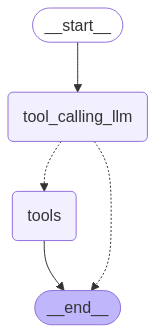

In [46]:
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [50]:
messages = graph.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_bgcv)
 Call ID: call_bgcv
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The do


### New Graph/workflow

In [51]:
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")
graph = builder.compile()

In [53]:
messages = graph.invoke({"messages":HumanMessage(content="what is NLP and what is 1706.03762")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is NLP and what is 1706.03762
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_pesh)
 Call ID: call_pesh
  Args:
    query: Natural Language Processing
  arxiv (call_77vy)
 Call ID: call_77vy
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: wikipedia

Page: Natural language processing
Summary: Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computer
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The do
================================== 